In [56]:
#yahoo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set pd for 2 decimal float 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#read Data form CSV
fileName="AMZN.csv"#input("please put file name ")
df=pd.read_csv(fileName,header=0)

#Select some columns
df[['Date', 'Open']]
# add calculated col Candle stick 
df['Candle'] = df.Close - df.Open
df['Ch%']=(df.Candle/df.Open)*100
#Highs 
df['H%']=((df.High-df.Open)/df.Open)*100

#lows
df['L%']=((df.Open-df.Low)/df.Open)*100

#High - low value 
df['HL']=df.High-df.Low
df['HLCH%']=(df.HL/df.Open)*100

#Low to close 
df['LtC']=df.Close-df.Low
df['LtC%']=(df.LtC/df.Open)*100

# Converte date col to date type then get day name by date value 
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
#Calculate mean , median 

# apply up trend if Candle is postive other is negative 
df['UPTrend'] = np.where(df['Candle']>0, True, False)
FilteredDf= df[['Date','Open','Candle','Ch%','H%','L%','HL','HLCH%','LtC%','Day','UPTrend']]
uptrend= FilteredDf.loc[df['UPTrend'] == True]
downtrend= FilteredDf.loc[df['UPTrend'] == False]

#Pivot Table only Important informtaion
table = pd.pivot_table(FilteredDf, values=['Ch%','H%','L%','HLCH%','LtC%'], index=['Day','UPTrend'],
                    aggfunc={'Ch%': [max,min,np.mean,np.median],
                            'H%': [max,min,np.mean,np.median],
                            'L%': [max,min,np.mean,np.median],
                            'HLCH%':[max,min,np.mean,np.median],
                            'LtC%':[max,min,np.mean,np.median]})
df['Date'].iloc[0]
print("Data from :")
print(df['Date'].iloc[0])
print("Data to :")
print(df['Date'].iloc[-1])

FilteredDf['L%'].mode()

Data from :
2020-03-18 00:00:00
Data to :
2021-03-17 00:00:00


0   0.00
dtype: float64

In [75]:
#Days

Monday=FilteredDf.loc[df['Day'] == 'Monday']
Tuesday=FilteredDf.loc[df['Day'] == 'Tuesday']
Wednesday=FilteredDf.loc[df['Day'] == 'Wednesday']
Thursday=FilteredDf.loc[df['Day'] == 'Thursday']
Friday=FilteredDf.loc[df['Day'] == 'Friday']

#TimeFrame
#Spicific Date 
Mar15=df.loc[df['Date']>='2021-03-15']

#last 5 days 
LastW=df.set_index("Date").last("1W")

#Month
Last1M=df.set_index("Date").last("1M")

#6month
Last6M=df.set_index("Date").last("6M")

#Year Start
thisY=df.set_index("Date").last("1Y")


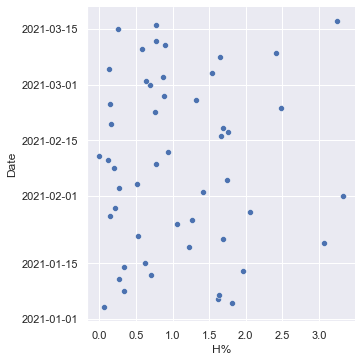

In [57]:
#Draw



In [103]:
table = pd.pivot_table(Last6M, values=['Ch%','H%','L%','HLCH%','LtC%'], index=['Day','UPTrend'],
                    aggfunc={'Ch%': [min,max,np.mean,np.median],
                            'H%': [min,max,np.mean,np.median],
                            'L%': [min,max,np.mean,np.median],
                            'HLCH%':[min,max,np.mean,np.median],
                            'LtC%':[min,max,np.mean,np.median]})
table

Ch%                        H%                  HLCH%       \
                    max  mean median    min   max mean median  min   max mean   
Day       UPTrend                                                               
Friday    False    0.00 -2.57  -2.11  -8.13  3.23 0.92   0.51 0.00 11.96 5.13   
          True     7.88  2.85   1.80   0.17 10.79 3.94   3.05 0.61 11.20 4.68   
Monday    False   -0.58 -3.07  -2.50  -7.89  2.48 0.77   0.47 0.18 11.58 5.45   
          True     6.35  2.60   2.56   0.23  9.25 4.51   4.46 0.84  9.67 5.62   
Thursday  False   -0.46 -2.66  -1.82 -10.97  7.08 1.63   1.06 0.00 24.35 6.01   
          True     7.40  3.00   2.84   0.08  8.62 4.26   3.94 0.65  8.82 5.03   
Tuesday   False   -0.10 -2.60  -2.58  -5.65  2.50 0.99   0.97 0.11 11.17 4.70   
          True     3.49  1.28   0.92   0.05  4.76 2.27   1.96 0.41  6.22 4.11   
Wednesday False    0.00 -1.93  -1.32  -6.59  3.49 1.33   0.95 0.48 10.89 4.56   
          True     7.39  2.35   1.57   0.08 15.50 4.04   3.29 1.42 15.76 5.20   

                                 L%                     LtC%                   
                  median  min   max  mean median    min  max mean median  min  
Day       UPTrend                                                              
Friday    False     4.03 2.69 -1.12 -4.20  -2.79 -11.50 7.06 1.64   1.35 0.12  
          True      3.67 2.01 -0.23 -0.74  -0.69  -1.40 8.30 3.59   2.81 1.57  
Monday    False     5.53 2.05 -1.50 -4.67  -4.38 -11.03 3.14 1.61   1.19 0.11  
          True      5.00 2.23 -0.38 -1.11  -0.68  -2.67 6.82 3.71   3.67 0.94  
Thursday  False     3.83 1.60 -0.97 -4.38  -2.74 -17.27 6.30 1.72   1.02 0.00  
          True      4.29 2.70 -0.06 -0.78  -0.71  -2.05 7.88 3.77   3.19 1.26  
Tuesday   False     4.04 2.37 -0.63 -3.71  -3.19  -9.38 9.28 1.11   0.50 0.16  
          True      4.35 2.21 -0.34 -1.84  -1.33  -4.89 5.17 3.11   3.32 1.29  
Wednesday False     3.40 2.34 -1.39 -3.22  -2.04  -9.47 2.89 1.29   0.89 0.08  
          True      4.81 2.27 -0.06 -1.16  -1.10  -2.71 7.65 3.51   2.75 0.57

In [210]:
Last6M.describe()
#Last6M[['Open']].mode()

,Open,High,Low,Close,Adj Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%
count,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,3196.50,3230.53,3153.80,3190.29,3190.29,4115559.13,-6.21,-0.19,1.07,-1.33,76.73,2.40,36.49,1.15
std,95.42,97.18,95.61,97.47,97.47,1366006.07,46.93,1.46,0.88,1.10,34.30,1.06,28.68,0.90
min,3005.00,3009.00,2881.00,2951.95,2951.95,1451900.00,-121.60,-3.85,0.00,-6.04,25.96,0.81,0.31,0.01
25%,3128.16,3159.95,3089.00,3119.41,3119.41,3085900.00,-34.43,-1.06,0.38,-1.77,53.26,1.68,14.78,0.45
50%,3189.87,3216.19,3153.30,3185.27,3185.27,3808700.00,-4.54,-0.15,0.77,-1.06,67.61,2.10,31.80,0.99
75%,3252.03,3296.84,3216.15,3262.75,3262.75,4790900.00,17.91,0.57,1.68,-0.50,91.89,2.91,53.35,1.63
max,3467.99,3496.24,3424.22,3443.63,3443.63,8386400.00,100.52,3.10,4.37,-0.01,239.66,7.13,119.46,3.98


In [192]:
Described=Last6M.loc[Last6M['UPTrend'] == True].loc[Last6M['Day'] == 'Friday' ].describe()


In [202]:
import pandas as pd
import numpy as np
priceToday=int(input("Please Enter Price Today "))
print('Open Price= ',priceToday)
print('When Trend Up')
print('#High')

print('Max : ',int(int(priceToday)*((Described['H%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['H%'].iloc[5]/100)+1)))
print('Min: ' ,int(int(priceToday)*((Described['H%'].iloc[3]/100)+1)))

print('#Low')
print('Min: ' ,int(int(priceToday)*((Described['L%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['L%'].iloc[5]/100)+1)) )
print('Max : ', int(int(priceToday)*((Described['L%'].iloc[3]/100)+1)))

print('#################################################')

print('#Low')
print('Min: ' ,int(int(priceToday)*((Described['L%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['L%'].iloc[5]/100)+1)) )
print('Max : ', int(int(priceToday)*((Described['L%'].iloc[3]/100)+1)))

Please Enter Price Today 3029
Open Price=  3029
When Trend Up
#High
Max :  3103
Mid :  3050
Min:  3039
#Low
Min:  3017
Mid :  2999
Max :  2962
#################################################


In [50]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,Candle,Ch%,H%,L%,HL,HLCH%,LtC,LtC%,Day,UPTrend
0,2020-03-18,1750.00,1841.66,1745.00,1830.00,1830.00,9645200,80.00,4.57,5.24,0.29,96.66,5.52,85.00,4.86,Wednesday,True
1,2020-03-19,1860.00,1945.00,1832.65,1880.93,1880.93,10399900,20.93,1.13,4.57,1.47,112.35,6.04,48.28,2.60,Thursday,True
2,2020-03-20,1926.31,1957.00,1820.73,1846.09,1846.09,9817900,-80.22,-4.16,1.59,5.48,136.27,7.07,25.36,1.32,Friday,False
3,2020-03-23,1827.75,1919.40,1812.00,1902.83,1902.83,7808500,75.08,4.11,5.01,0.86,107.40,5.88,90.83,4.97,Monday,True
4,2020-03-24,1951.50,1955.00,1900.34,1940.10,1940.10,7147100,-11.40,-0.58,0.18,2.62,54.66,2.80,39.76,2.04,Tuesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-03-11,3104.01,3131.78,3082.93,3113.59,3113.59,2770800,9.58,0.31,0.89,0.68,48.85,1.57,30.66,0.99,Thursday,True
248,2021-03-12,3075.00,3098.98,3045.50,3089.49,3089.49,2418500,14.49,0.47,0.78,0.96,53.48,1.74,43.99,1.43,Friday,True
249,2021-03-15,3074.57,3082.24,3032.09,3081.68,3081.68,2913600,7.11,0.23,0.25,1.38,50.15,1.63,49.59,1.61,Monday,True
250,2021-03-16,3104.97,3128.91,3075.86,3091.86,3091.86,2510100,-13.11,-0.42,0.77,0.94,53.05,1.71,16.00,0.52,Tuesday,False


,Open,Candle,Ch%,H%,L%,HL,HLCH%,LtC%
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,2937.88,-1.70,-0.00,1.33,1.41,79.75,2.74,1.41
std,421.68,52.27,1.81,1.21,1.24,39.64,1.34,1.20
min,1750.00,-147.06,-4.52,0.00,0.00,23.18,0.81,0.00
25%,2646.51,-32.85,-1.06,0.45,0.51,51.86,1.80,0.50
50%,3122.51,0.92,0.03,0.93,1.05,70.80,2.40,1.17
75%,3209.02,30.07,1.09,1.89,1.91,97.53,3.48,1.86
max,3547.00,196.64,6.55,6.86,6.23,275.90,8.49,6.76


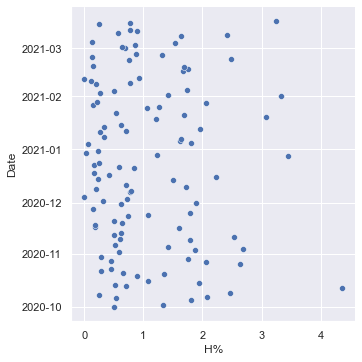

In [80]:

sns.relplot(x="H%", y="Date", data=Last6M);
.describe()


In [81]:
import pandas as pd
import numpy as np
priceToday=int(input("Please Enter Price Today "))
print('Open Price= ',priceToday)
print('When Trend Up')
print('#High')

print('Max : ',int(int(priceToday)*((Described['H%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['H%'].iloc[5]/100)+1)))
print('Min: ' ,int(int(priceToday)*((Described['H%'].iloc[3]/100)+1)))

print('#Low')
print('Min: ' ,int(int(priceToday)*((Described['L%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['L%'].iloc[5]/100)+1)) )
print('Max : ', int(int(priceToday)*((Described['L%'].iloc[3]/100)+1)))

print('#################################################')

print('#Low')
print('Min: ' ,int(int(priceToday)*((Described['L%'].iloc[7]/100)+1)))
print('Mid : ',int(int(priceToday)*((Described['L%'].iloc[5]/100)+1)) )
print('Max : ', int(int(priceToday)*((Described['L%'].iloc[3]/100)+1)))

Please Enter Price Today 3013
Open Price=  3013
When Trend Up
#High


NameError: name 'Described' is not defined